## ASSIGNMENT 7-TOPICMODELING

Topic modeling is a technique used in natural language processing (NLP) and machine learning to discover abstract topics or themes present in a collection of documents. It's particularly useful for analyzing large text corpora and finding patterns within them.



## IMPORTING REQUIRED PACKAGES

In [1]:
#importing pandas and reading file
import pandas as pd
file = "text.csv"
df = pd.read_csv(file)
df.head(20)


number                                               text  label
0        0      i just feel really helpless and heavy hearted      4
1        1  ive enjoyed being able to slouch about relax a...      0
2        2  i gave up my internship with the dmrg and am f...      4
3        3                         i dont know i feel so lost      0
4        4  i am a kindergarten teacher and i am thoroughl...      4
5        5         i was beginning to feel quite disheartened      0
6        6  i would think that whomever would be lucky eno...      2
7        7  i fear that they won t ever feel that deliciou...      1
8        8  im forever taking some time out to have a lie ...      5
9        9  i can still lose the weight without feeling de...      0
10      10  i try to be nice though so if you get a bitchy...      1
11      11  im feeling a little like a damaged tree and th...      0
12      12  i have officially graduated im not feeling as ...      1
13      13  i feel like a jerk because the library student...      3
14      14  i feel my portfolio demonstrates how eager i a...      1
15      15  i may be more biased than the next because i h...      1
16      16                             i didn t feel terrific      1
17      17  i miss all the others as well that feel that i...      3
18      18         i feel so stupid that i realise it so late      0
19      19  i saunter through the airport terminals feelin...      3

## DISPLAYING FIRST 400 CHARACTERS

In [2]:
#Displaying 400 characters of text from specific rows in the DataFrame using iloc
print(repr(df.iloc[2666]["text"][0:400]))
print(repr(df.iloc[4726]["text"][0:400]))


'im not an artist by any means but i like how i feel when im doing some of this creative multimedia stuff'
'im so happy i have more energy amp motivation to even put on make up in the mornings now it really boosts my confidence amp make me feel pretty'


## SPLITTING TEXT

In [3]:
import re
# Splitting text into paragraphs
df["paragraphs"] = df["text"].map(lambda text: re.split('\.\s*\n', text))
# Calculating the number of paragraphs in each text
df["number_of_paragraphs"] = df["paragraphs"].map(len)

## TF-IDF VECTORISATION OF TEXT DATA USING SCIKIT-LEARN

In [4]:
#TF-IDF vectorization on the text data in the DataFrame using scikit-learn's TfidfVectorizer.
from sklearn.feature_extraction.text import TfidfVectorizer
from spacy.lang.en.stop_words import STOP_WORDS as stopwords

# Convert spaCy stop words to a list
stopwords_list = list(stopwords)

tfidf_text_vectorizer = TfidfVectorizer(stop_words=stopwords_list, min_df=5, max_df=0.7)
tfidf_text_vectors = tfidf_text_vectorizer.fit_transform(df['text'])
tfidf_text_vectors.shape



/Users/likithareddykotla/anaconda3/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ll', 've'] not in stop_words.
  warnings.warn(


(416809, 22217)

## FLATTEN PARAGRAPHS 


In [5]:
# flatten the paragraphs keeping the years
paragraph_df = pd.DataFrame([{ "text": paragraph, "label": year } 
                               for paragraphs, year in zip(df["paragraphs"], df["label"]) 
                                    for paragraph in paragraphs if paragraph])
paragraph_df.head(10)


text  label
0      i just feel really helpless and heavy hearted      4
1  ive enjoyed being able to slouch about relax a...      0
2  i gave up my internship with the dmrg and am f...      4
3                         i dont know i feel so lost      0
4  i am a kindergarten teacher and i am thoroughl...      4
5         i was beginning to feel quite disheartened      0
6  i would think that whomever would be lucky eno...      2
7  i fear that they won t ever feel that deliciou...      1
8  im forever taking some time out to have a lie ...      5
9  i can still lose the weight without feeling de...      0

## TF-IDF VECTORISATION OF PARAGRAPHS USING SCIKIT-LEARN


In [6]:
# Convert spaCy stop words to a list
stopwords_list = list(stopwords)

tfidf_para_vectorizer = TfidfVectorizer(stop_words=stopwords_list, min_df=5, max_df=0.7)
tfidf_para_vectors = tfidf_para_vectorizer.fit_transform(paragraph_df["text"])
tfidf_para_vectors.shape

/Users/likithareddykotla/anaconda3/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ll', 've'] not in stop_words.
  warnings.warn(


(416809, 22217)

## TOPIC MODELING WITH NON-NEGATIVE MATRIX FACTORISATION (NMF)
Topic modeling with Non-negative Matrix Factorization (NMF) is a technique used in natural language processing (NLP) to discover latent topics within a corpus of text documents. NMF decomposes a document-term matrix into two lower-dimensional matrices: a document-topic matrix and a topic-term matrix, where all elements in these matrices are non-negative.

In [7]:
# Imports NMF from sklearn.decomposition, initializes an NMF model
from sklearn.decomposition import NMF

nmf_text_model = NMF(n_components=10, random_state=42)
W_text_matrix = nmf_text_model.fit_transform(tfidf_text_vectors)
H_text_matrix = nmf_text_model.components_


## DISPLAYING TOP WORDS IN EACH TOPIC

In [8]:
#This function takes an NMF model, the list of features (words), and an optional parameter specifying the number of top words to display for each topic.
def display_topics(model, features, no_top_words=5):
    for topic, words in enumerate(model.components_):
        total = words.sum()
        largest = words.argsort()[::-1]  # invert sort order
        print("\nTopic %02d" % topic)
        for i in range(0, no_top_words):
            print("  %s (%2.2f)" % (features[largest[i]], abs(words[largest[i]] * 100.0 / total)))

display_topics(nmf_text_model, tfidf_text_vectorizer.get_feature_names_out())


Topic 00
  feel (6.50)
  people (0.56)
  life (0.54)
  think (0.51)
  way (0.47)

Topic 01
  feeling (8.89)
  ive (0.98)
  today (0.66)
  left (0.61)
  day (0.52)

Topic 02
  im (36.29)
  sure (2.35)
  right (1.52)
  going (1.50)
  today (1.00)

Topic 03
  like (19.18)
  feel (1.42)
  ive (0.90)
  feels (0.85)
  person (0.75)

Topic 04
  know (19.23)
  dont (9.09)
  don (2.04)
  feels (1.98)
  people (1.86)

Topic 05
  little (32.13)
  help (1.26)
  girl (0.72)
  apprehensive (0.72)
  starting (0.57)

Topic 06
  time (18.21)
  long (1.72)
  spend (1.05)
  lot (0.70)
  things (0.62)

Topic 07
  want (24.61)
  don (6.17)
  dont (1.53)
  things (1.14)
  feelings (0.97)

Topic 08
  http (15.11)
  href (14.57)
  pretty (12.40)
  www (5.43)
  src (1.24)

Topic 09
  bit (35.28)
  today (2.75)
  overwhelmed (0.86)
  melancholy (0.74)
  strange (0.67)


## TOPIC MODELING USING NON-NEGATIVE MATRIX

In [9]:
# Fit the NMF model to TF-IDF vectors of paragraph data
nmf_para_model = NMF(n_components=10, random_state=42)
W_para_matrix = nmf_para_model.fit_transform(tfidf_para_vectors)
H_para_matrix = nmf_para_model.components_

display_topics(nmf_para_model, tfidf_para_vectorizer.get_feature_names_out())


Topic 00
  feel (6.50)
  people (0.56)
  life (0.54)
  think (0.51)
  way (0.47)

Topic 01
  feeling (8.89)
  ive (0.98)
  today (0.66)
  left (0.61)
  day (0.52)

Topic 02
  im (36.29)
  sure (2.35)
  right (1.52)
  going (1.50)
  today (1.00)

Topic 03
  like (19.18)
  feel (1.42)
  ive (0.90)
  feels (0.85)
  person (0.75)

Topic 04
  know (19.23)
  dont (9.09)
  don (2.04)
  feels (1.98)
  people (1.86)

Topic 05
  little (32.13)
  help (1.26)
  girl (0.72)
  apprehensive (0.72)
  starting (0.57)

Topic 06
  time (18.21)
  long (1.72)
  spend (1.05)
  lot (0.70)
  things (0.62)

Topic 07
  want (24.61)
  don (6.17)
  dont (1.53)
  things (1.14)
  feelings (0.97)

Topic 08
  http (15.11)
  href (14.57)
  pretty (12.40)
  www (5.43)
  src (1.24)

Topic 09
  bit (35.28)
  today (2.75)
  overwhelmed (0.86)
  melancholy (0.74)
  strange (0.67)


## CALCULATING PERCENTAGE ACROSS DOCUMENTS

In [10]:
# calculates the percentage distribution of topics across documents
W_text_matrix.sum(axis=0)/W_text_matrix.sum()*100.0


array([17.48216398, 21.77411507, 10.60839661, 13.59599161,  7.93304673,
        5.62785085,  6.31399987,  6.67788934,  4.45335334,  5.53319259])

## CALCULATING TOPIC DISTRIBUTION PERCENTAGE ACROSS PARAGRAPHS

In [11]:
#calculates the percentage distribution of topics across paragraphs.
W_para_matrix.sum(axis=0)/W_para_matrix.sum()*100.0


array([17.48216398, 21.77411507, 10.60839661, 13.59599161,  7.93304673,
        5.62785085,  6.31399987,  6.67788934,  4.45335334,  5.53319259])

## COUNT VECTORIZATION OF PARAGRAPHS USING SCIKIT-LEARN


In [12]:
#converts spaCy stop words to a list and initializes a CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from spacy.lang.en.stop_words import STOP_WORDS as stopwords

# Convert spaCy stop words to a list
stopwords_list = list(stopwords)

count_para_vectorizer = CountVectorizer(stop_words=stopwords_list, min_df=5, max_df=0.7)
count_para_vectors = count_para_vectorizer.fit_transform(paragraph_df["text"])
count_para_vectors.shape


/Users/likithareddykotla/anaconda3/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ll', 've'] not in stop_words.
  warnings.warn(


(416809, 22217)

## TOPIC MODELING FOR PARAGRAPHS USING LDA
Latent Dirichlet Allocation (LDA) is a widely used generative statistical model for topic modeling, a technique used in natural language processing (NLP) to discover latent topics within a collection of documents. LDA assumes that each document is a mixture of various topics and that each word in the document is attributable to one of the document's topic

In [13]:
#fits the LDA model to the count vectors of paragraph data
from sklearn.decomposition import LatentDirichletAllocation

lda_para_model = LatentDirichletAllocation(n_components = 10, random_state=42)
W_lda_para_matrix = lda_para_model.fit_transform(count_para_vectors)
H_lda_para_matrix = lda_para_model.components_


## DISPLAYING TOP WORDS FOR EACH TOPIC IN LDA MODEL

In [14]:
#takes the LDA model (model), the vectorizer used to generate features
def display_topics(model, vectorizer, no_top_words=5):
    feature_names = vectorizer.get_feature_names_out()
    for topic, words in enumerate(model.components_):
        total = words.sum()
        largest = words.argsort()[::-1]  # invert sort order
        print("\nTopic %02d" % topic)
        for i in range(0, no_top_words):
            print("  %s (%2.2f)" % (feature_names[largest[i]], abs(words[largest[i]] * 100.0 / total)))

display_topics(lda_para_model, count_para_vectorizer)


Topic 00
  feel (14.73)
  like (14.10)
  dont (1.91)
  know (1.61)
  want (0.98)

Topic 01
  feeling (10.20)
  time (1.79)
  ive (1.57)
  little (1.51)
  left (1.06)

Topic 02
  feeling (18.53)
  im (17.20)
  today (1.57)
  little (1.54)
  pretty (1.44)

Topic 03
  feel (6.37)
  feelings (2.55)
  write (1.04)
  friend (0.90)
  way (0.89)

Topic 04
  feel (12.06)
  want (2.74)
  people (2.52)
  life (1.10)
  work (0.89)

Topic 05
  feel (13.05)
  like (2.95)
  know (1.95)
  don (1.92)
  better (1.31)

Topic 06
  feel (10.66)
  http (2.76)
  href (2.41)
  today (1.10)
  feeling (1.07)

Topic 07
  feel (15.83)
  life (1.25)
  helpless (0.98)
  angry (0.93)
  blessed (0.91)

Topic 08
  feel (8.20)
  feeling (2.89)
  new (1.64)
  people (1.28)
  start (1.13)

Topic 09
  feel (7.28)
  love (4.90)
  feeling (3.90)
  hope (1.13)
  loved (1.09)


## CALCULATING TOPIC DISTRIBUTION

In [15]:
#calculates the percentage distribution of topics across paragraphs.
W_lda_para_matrix.sum(axis=0)/W_lda_para_matrix.sum()*100.0


array([13.09760533, 12.49535492, 11.67356161,  9.24087612, 12.1034185 ,
        9.77013133,  6.339676  , 10.28451237,  7.49759811,  7.49726573])

## WORDCLOUDS

In [16]:
#generates word clouds for each topic in a given topic model.
%matplotlib inline
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from IPython.core.display import display, HTML
display(HTML("<style>div.output_scroll { height: 44em; }</style>"))

def wordcloud_topics(model, features, no_top_words=40):
    for topic, words in enumerate(model.components_):
        size = {}
        largest = words.argsort()[::-1] # invert sort order
        for i in range(0, no_top_words):
            size[features[largest[i]]] = abs(words[largest[i]])
        wc = WordCloud(background_color="white", max_words=100, width=960, height=540)
        wc.generate_from_frequencies(size)
        plt.figure(figsize=(12,12))
        plt.imshow(wc, interpolation='bilinear')
        plt.axis("off")
        # if you don't want to save the topic model, comment the next line
        plt.savefig(f'topic{topic}.png')


/var/folders/2w/cf7h78nd7v70xjtj1g7b71s80000gn/T/ipykernel_1298/954136678.py:5: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


## WORDCLOUD FOR NMF MODEL
NMF stands for Non-negative Matrix Factorization. It's a technique used for dimensionality reduction and clustering in various fields, including natural language processing (NLP). In the context of NLP, NMF is commonly used for topic modeling, which involves discovering latent topics within a corpus of text documents

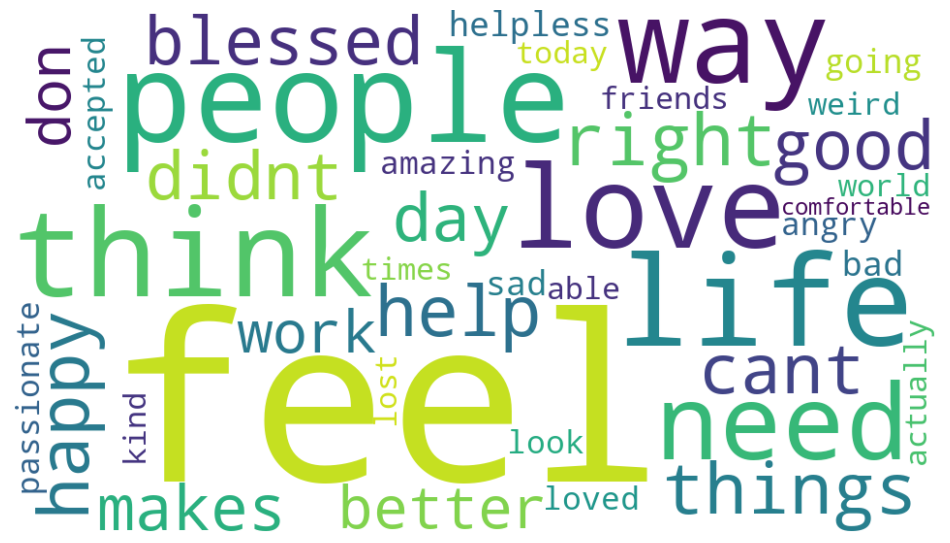

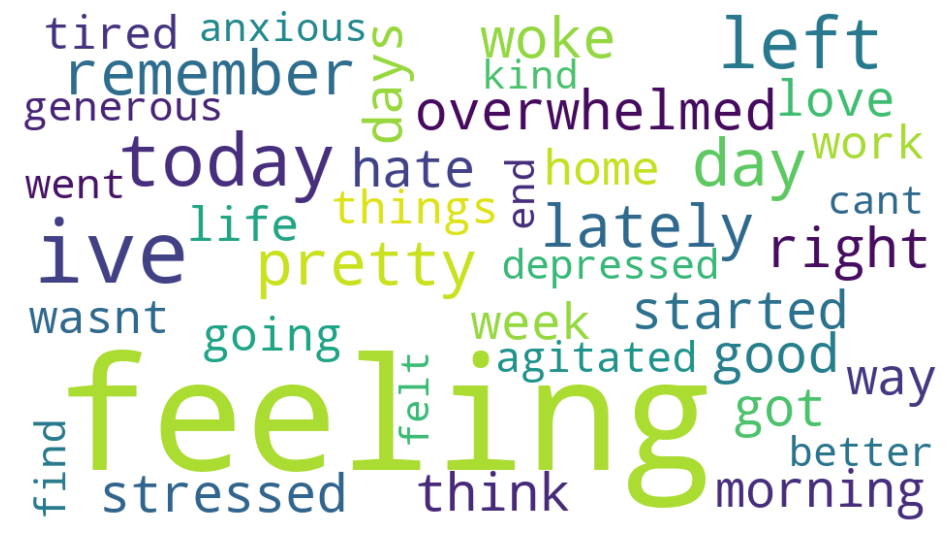

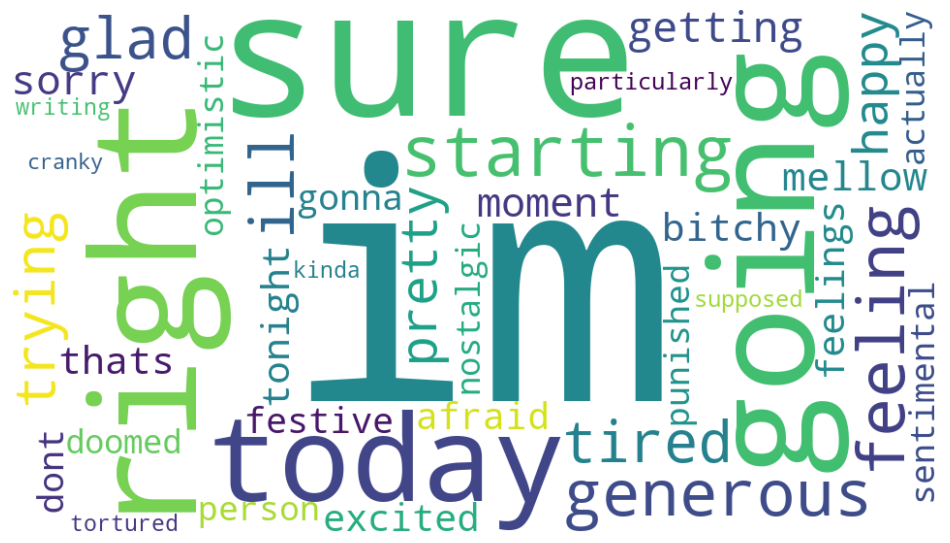

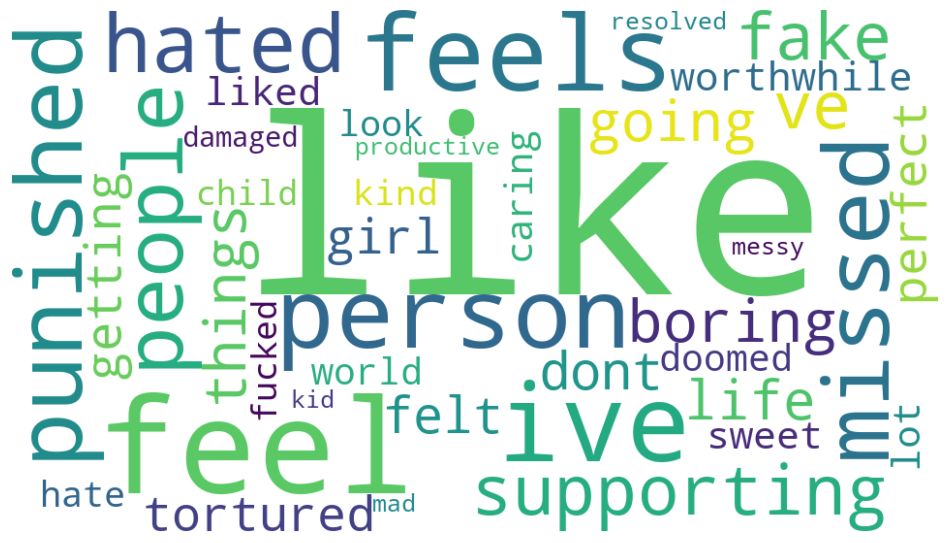

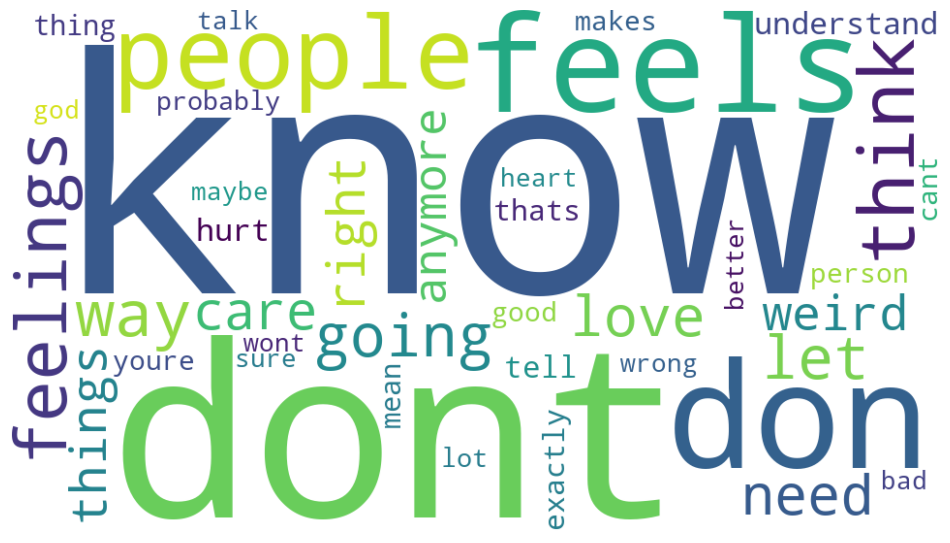

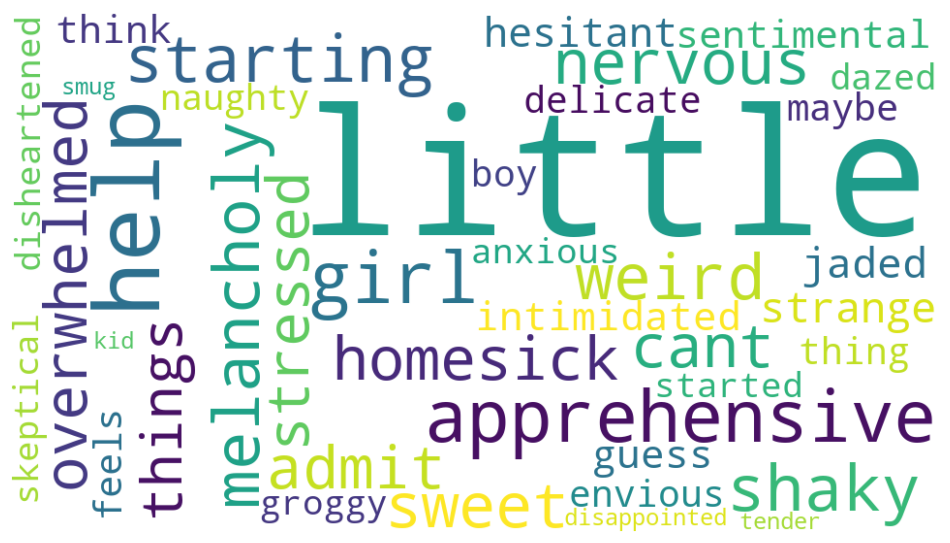

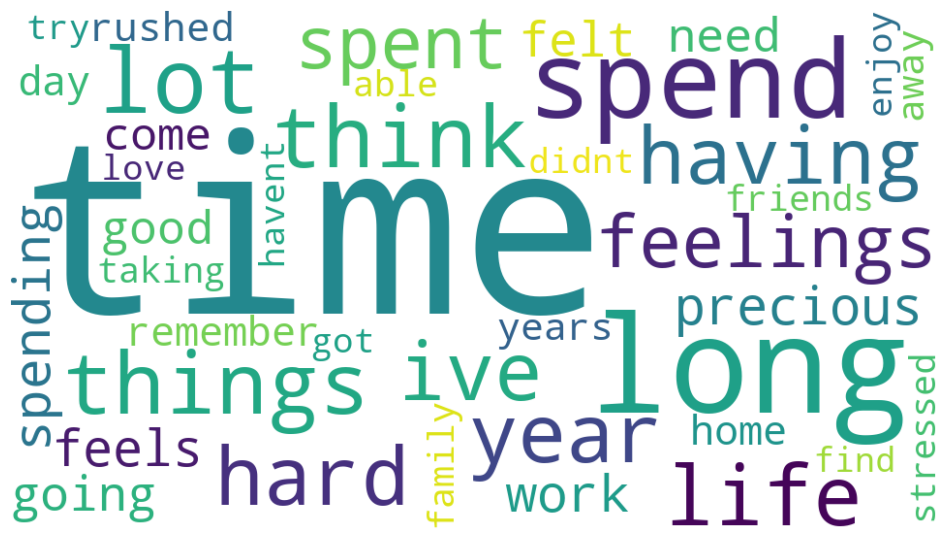

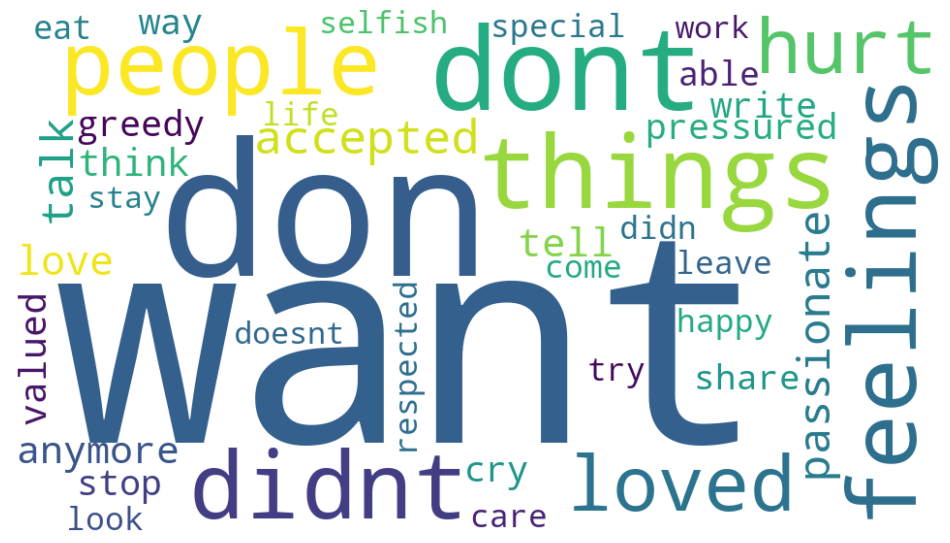

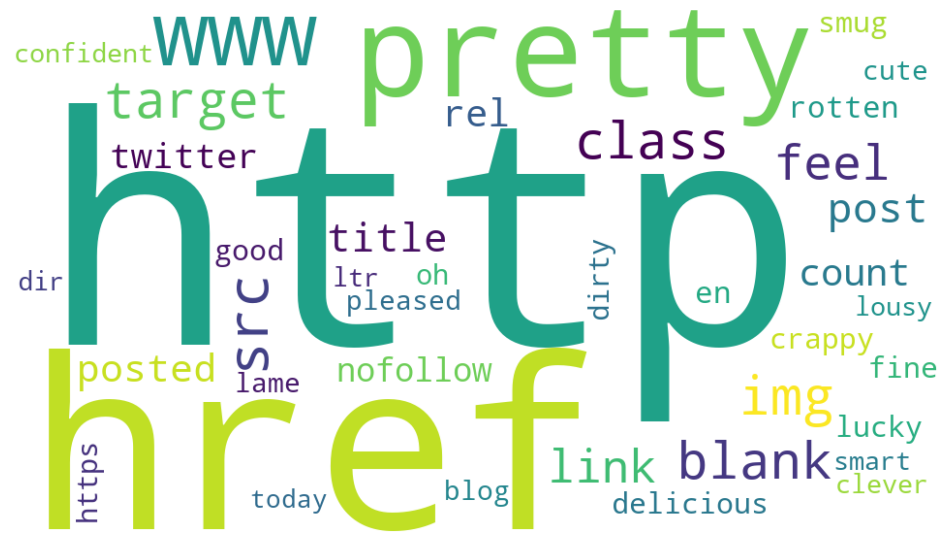

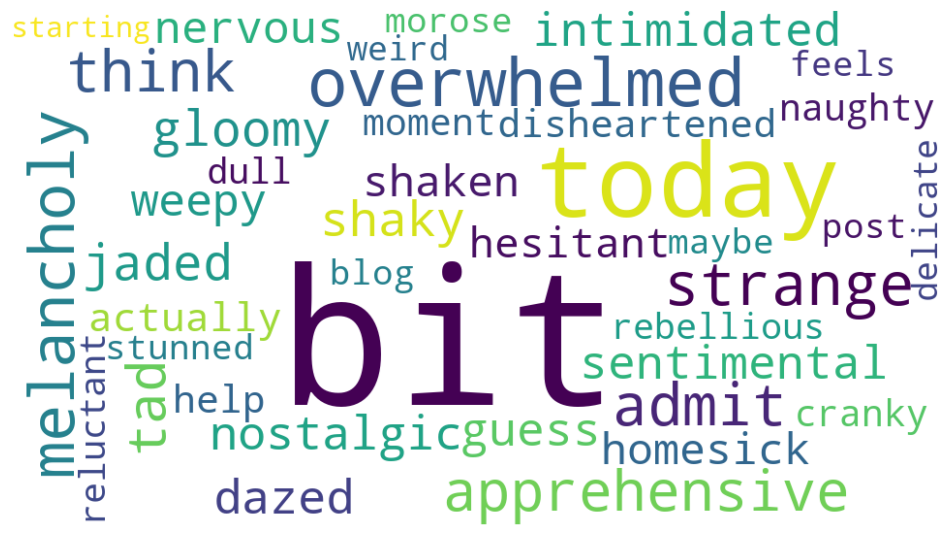

In [17]:
#iterates over each topic in the model, retrieves the top words and their frequencies, and generates a word cloud based
wordcloud_topics(nmf_para_model, tfidf_para_vectorizer.get_feature_names_out())


## WORDCLOUD FOR LDA MODEL

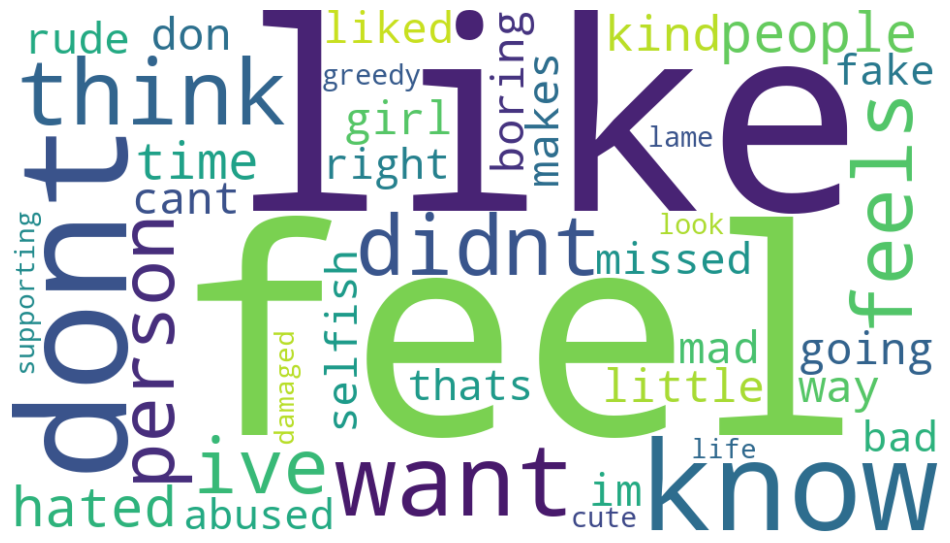

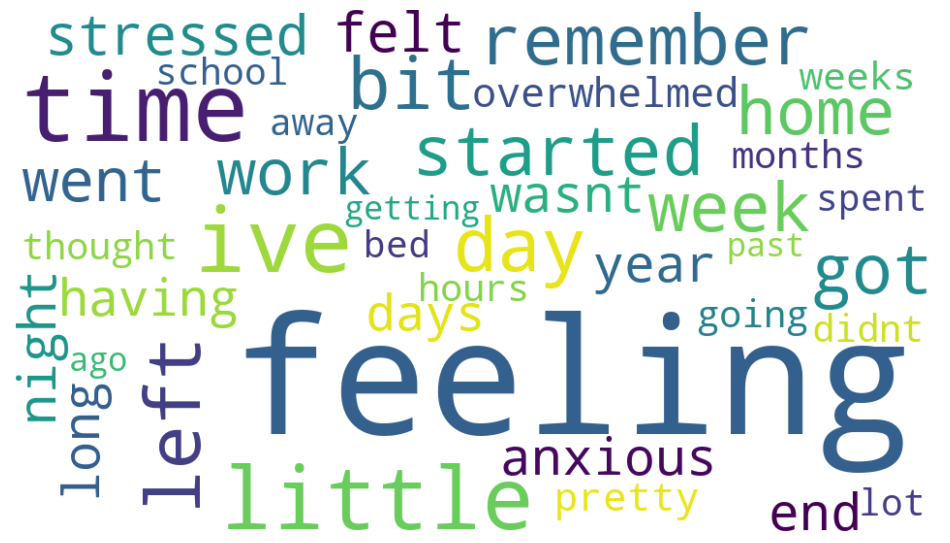

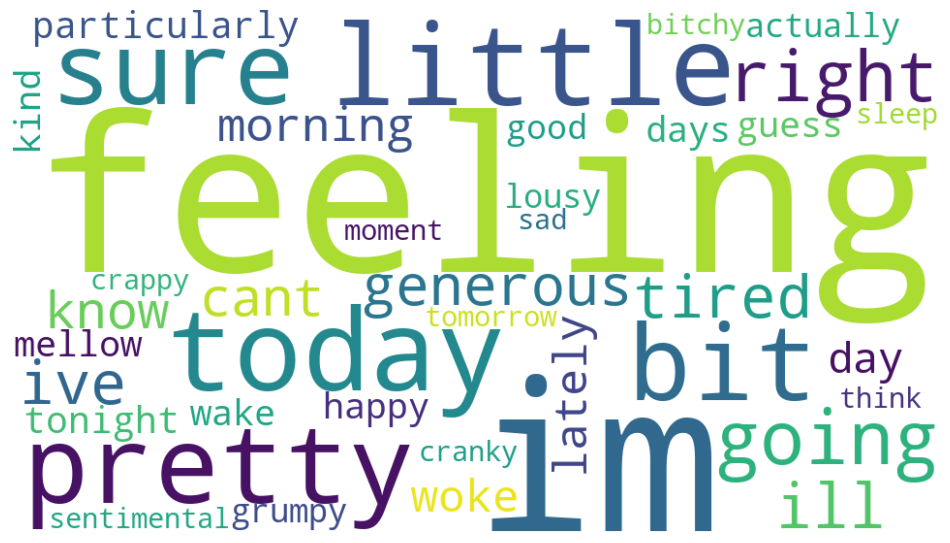

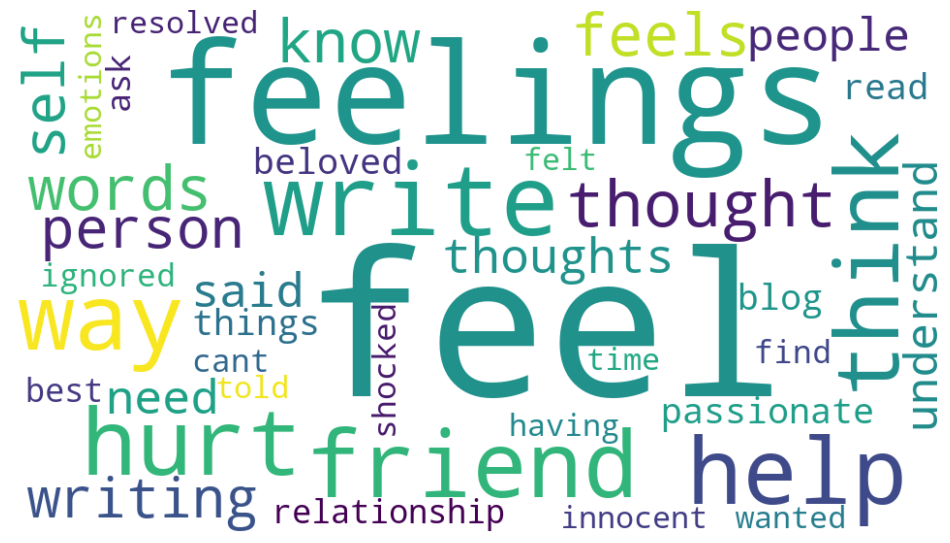

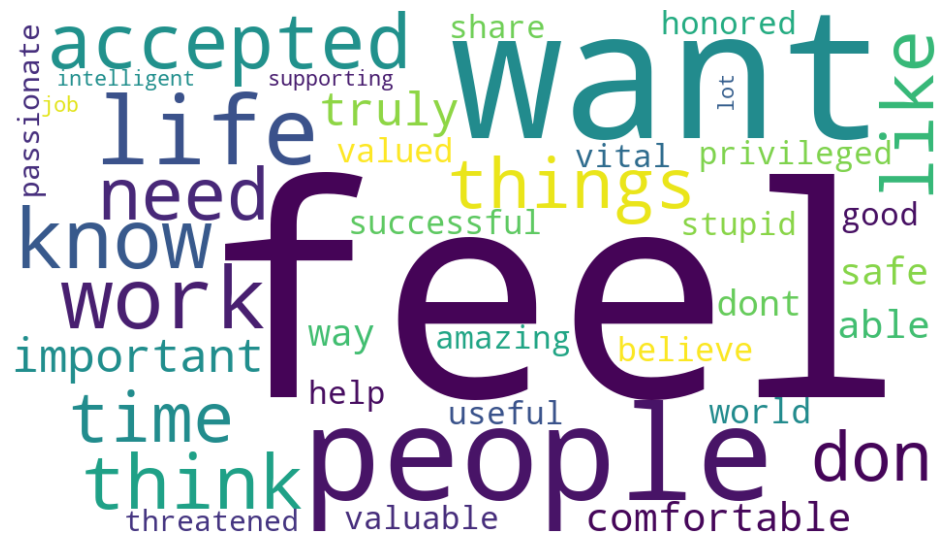

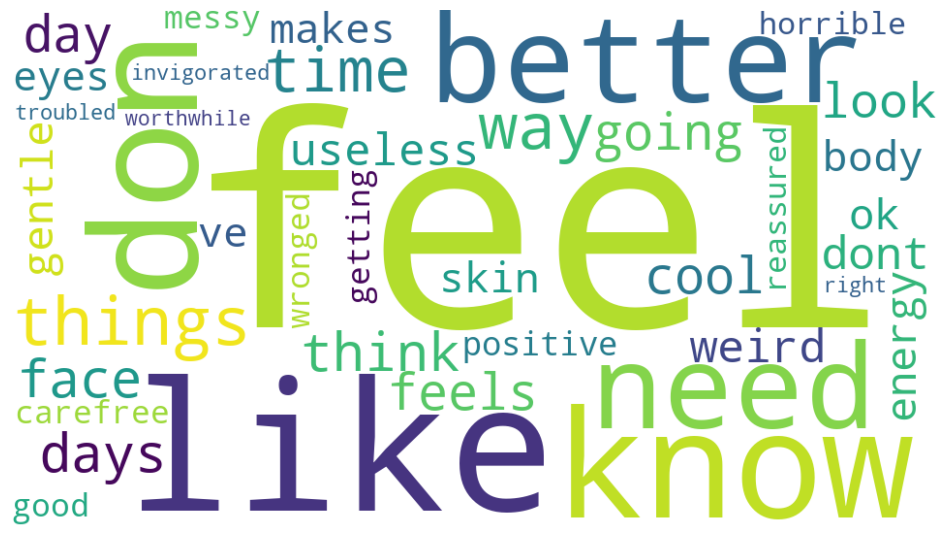

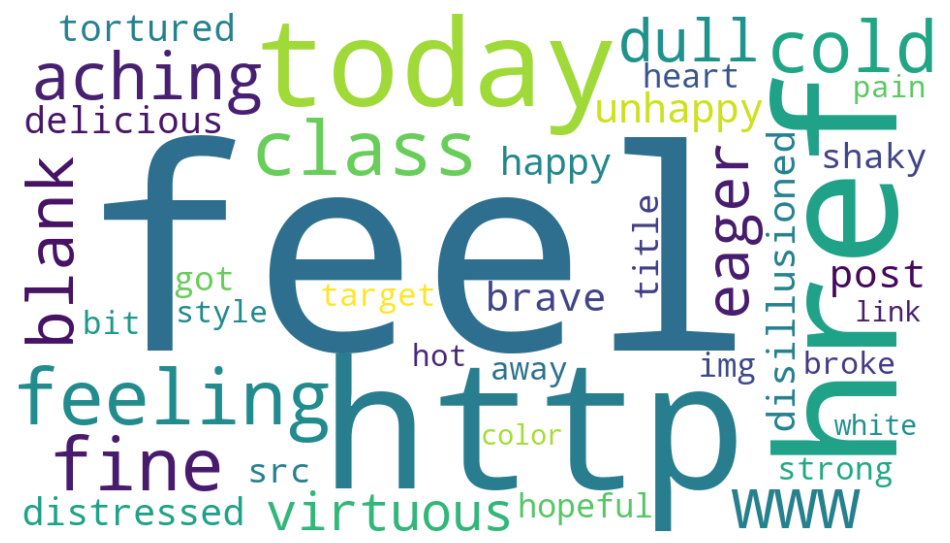

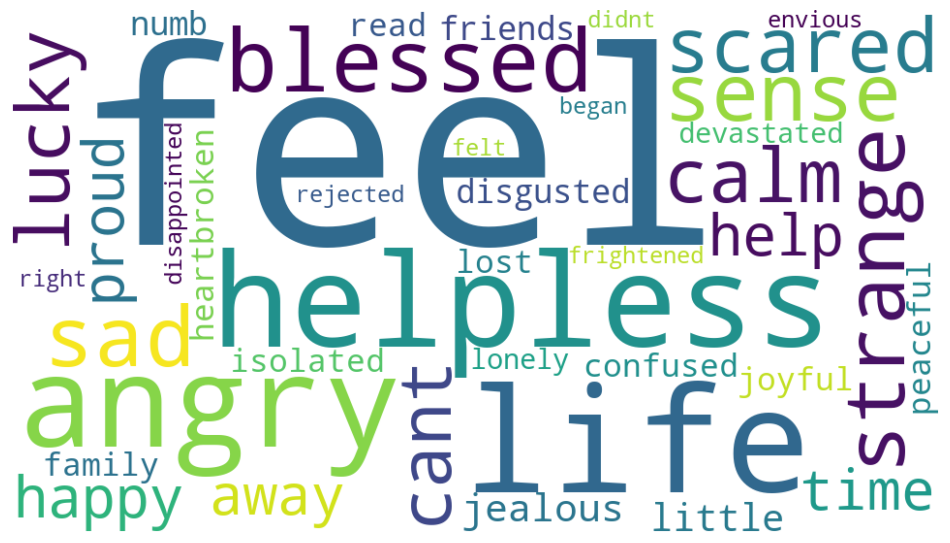

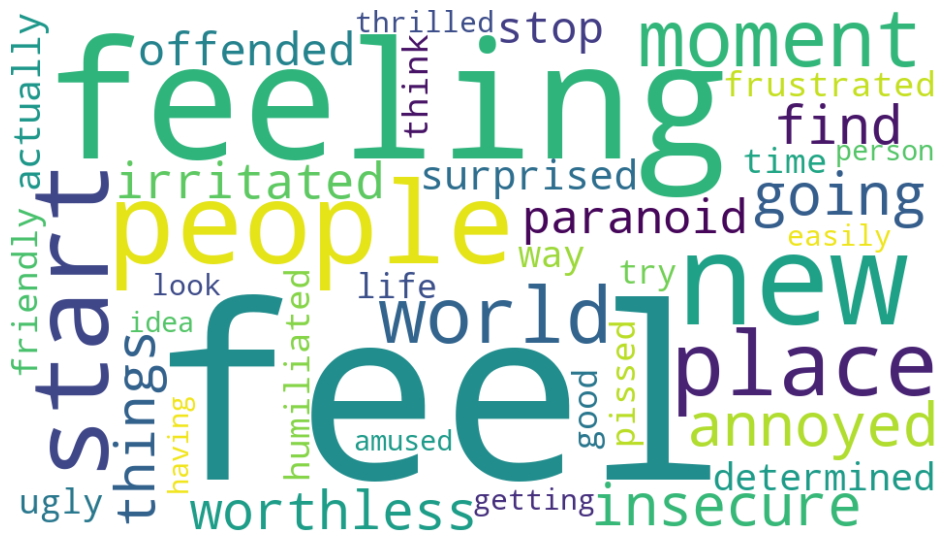

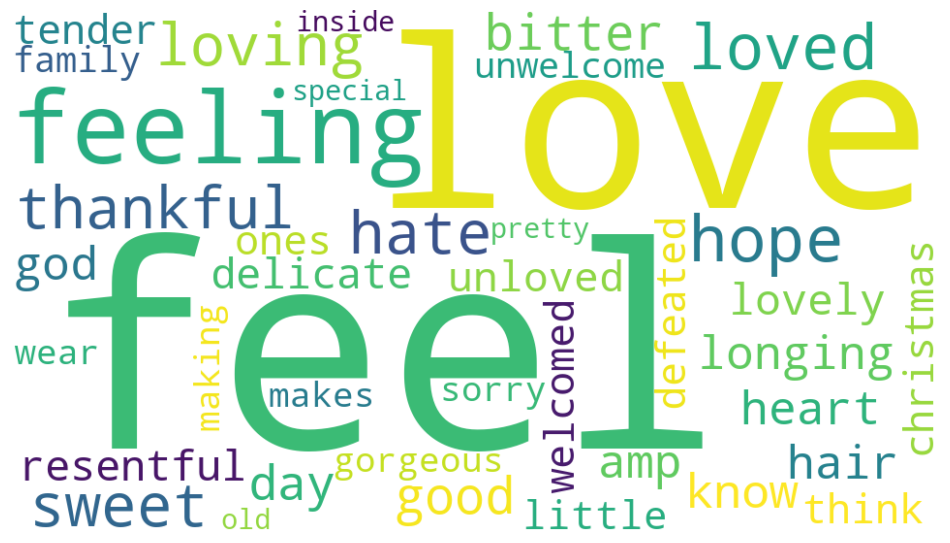

In [18]:
# wordcloud using matplotlib.pyplot, with customization for the appearance and size.
wordcloud_topics(lda_para_model, count_para_vectorizer.get_feature_names_out())


## TOPIC NAMES FOR NMF MODEL 


In [22]:
#iterates over each topic in the model's components and identifies the most important words.
topic_names = []
voc = tfidf_para_vectorizer.vocabulary_
# These top words are concatenated with a space and added to the list of topic names.
for topic in nmf_para_model.components_:
    important = topic.argsort()
    top_word = [word for word, index in voc.items() if index == important[-1]][0] + " " + [word for word, index in voc.items() if index == important[-2]][0]
    topic_names.append("Topic " + top_word)

## GENERATING TOPIC NAMES

In [26]:
# generates topic names for topics in an NMF model based on their top words
from tqdm.auto import tqdm
import numpy as np
year_data = []
for year in tqdm(np.unique(np.unique(paragraph_df["label"]))):
    W_year = nmf_para_model.transform(tfidf_para_vectors[np.array(paragraph_df["label"] == year)])
    year_data.append([year] + list(W_year.sum(axis=0)/W_year.sum()*100.0))


  0%|          | 0/6 [00:00<?, ?it/s]

## VISUALIZE TOPIC DISTRIBUTION OVER YEARS

<Axes: xlabel='label'>

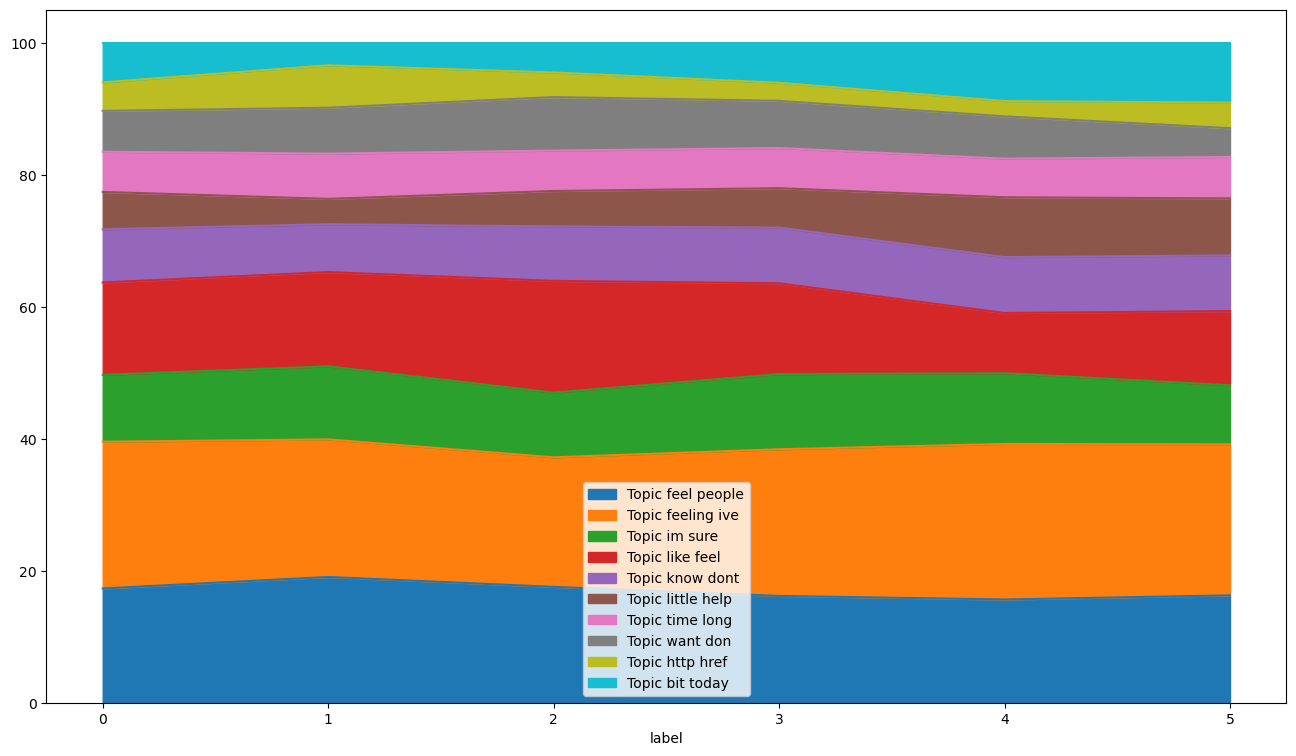

In [24]:
#imports matplotlib.pyplot as plt and uses it to visualize the distribution
import matplotlib.pyplot as plt
df_year = pd.DataFrame(year_data, columns=["label"] + topic_names).set_index("label")
df_year.plot.area(figsize=(16,9))
